In [ ]:
import pandas as pd
import numpy as np

#ignore harmless warning
import warnings
warnings.filterwarnings('ignore')

#set to dispaly all columns in dataset

pd.set_option("display.max_columns",None)





In [ ]:
alzi = pd.read_csv("/content/drive/MyDrive/clinical-data-for Alzheimers.csv")
alzi.head()

,Subject,Gender,mmse,ageAtEntry,cdr,memory,dx1
0,OAS30124,female,16,79.14579,1.0,1,'AD Dementia'
1,OAS30124,female,21,79.14579,0.5,0.5,'AD Dementia'
2,OAS31129,female,20,68.07666,1.0,1,'AD Dementia'
3,OAS31129,female,28,68.07666,1.0,1,'AD Dementia'
4,OAS31129,female,29,68.07666,0.5,0.5,'AD Dementia'


In [ ]:
alzi.info()#mmse:minimentalstate examination Cdr:clinincal dementia rating

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject     1229 non-null   object 
 1   Gender      1229 non-null   object 
 2   mmse        1229 non-null   object 
 3   ageAtEntry  1229 non-null   float64
 4   cdr         1229 non-null   float64
 5   memory      1229 non-null   object 
 6   dx1         1229 non-null   object 
dtypes: float64(2), object(5)
memory usage: 67.3+ KB


In [ ]:
alzi_backup = alzi.copy()
alzi_backup

,Subject,Gender,mmse,ageAtEntry,cdr,memory,dx1
0,OAS30124,female,16,79.14579,1.0,1,'AD Dementia'
1,OAS30124,female,21,79.14579,0.5,0.5,'AD Dementia'
2,OAS31129,female,20,68.07666,1.0,1,'AD Dementia'
3,OAS31129,female,28,68.07666,1.0,1,'AD Dementia'
4,OAS31129,female,29,68.07666,0.5,0.5,'AD Dementia'
...,...,...,...,...,...,...,...
1224,OAS30397,male,22,68.90075,1.0,1,'AD Dementia'
1225,OAS30397,male,16,68.90075,1.0,1,'AD Dementia'
1226,OAS30886,male,28,67.77276,0.5,0.5,'AD Dementia'
1227,OAS30954,female,17,80.06844,1.0,1,'AD Dementia'


In [ ]:
alzi["mmse"].value_counts()

29    177
30    141
28    139
27    133
26    116
25    112
24     77
23     67
22     55
21     38
19     32
?      28
20     26
17     17
18     16
16     13
15      9
12      8
14      7
10      4
13      3
6       3
7       2
9       2
1       1
2       1
4       1
0       1
Name: mmse, dtype: int64

In [ ]:
alzi['mmse'] = alzi['mmse'].str.replace(r'?', '72')
alzi['memory'] = alzi['memory'].str.replace(r'?','1' )

alzi = alzi.dropna()
alzi.isnull().sum().sum()

0

In [ ]:
#split data to variables and target
X = alzi
Y = alzi['dx1']
del alzi

#Remove unnecessary columns (features), remove first 9 columns and 'Dx codes for submission'
remove_columns = list(X.columns)[0:1]
remove_columns.append('dx1')

print('Removing columns:', remove_columns)

X = X.drop(remove_columns, axis=1)

features = list(X.columns)
X.head(5)


Removing columns: ['Subject', 'dx1']


,Gender,mmse,ageAtEntry,cdr,memory
0,female,16,79.14579,1.0,1
1,female,21,79.14579,0.5,0.5
2,female,20,68.07666,1.0,1
3,female,28,68.07666,1.0,1
4,female,29,68.07666,0.5,0.5


In [ ]:
alzi.describe()

,ageAtEntry,cdr
count,1229.000000,1229.000000
mean,72.900069,0.702604
std,7.739166,0.415548
min,47.605750,0.000000
25%,67.550995,0.500000
50%,73.013010,0.500000
75%,78.650240,1.000000
max,95.567420,3.000000


In [ ]:
numerical_vars = ['ageAtEntry', 'mmse', 'cdr','memory']

categorical_vars = list(set(features) - set(numerical_vars))

print('Categorical variable distributions:\n')

for var in categorical_vars:
    print('\nDistribution of', var)

    print(X[var].value_counts())

Categorical variable distributions:


Distribution of Gender
male      692
female    537
Name: Gender, dtype: int64


Numerical Variable Distributions:



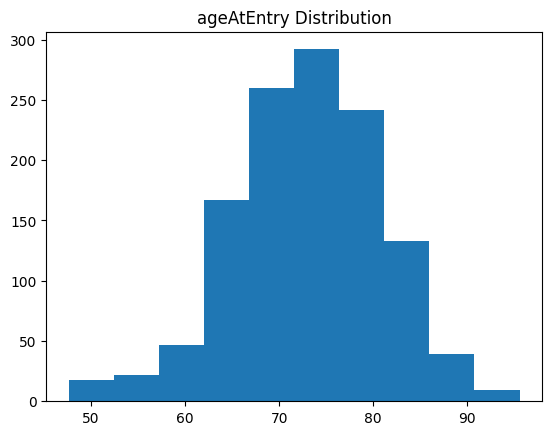

count    1229.000000
mean       72.900069
std         7.739166
min        47.605750
25%        67.550995
50%        73.013010
75%        78.650240
max        95.567420
Name: ageAtEntry, dtype: float64
73.344284    15
50.291580    14
69.609856    10
67.129364    10
68.303900    10
             ..
80.229980     1
65.308690     1
73.503080     1
60.301163     1
76.966460     1
Name: ageAtEntry, Length: 416, dtype: int64


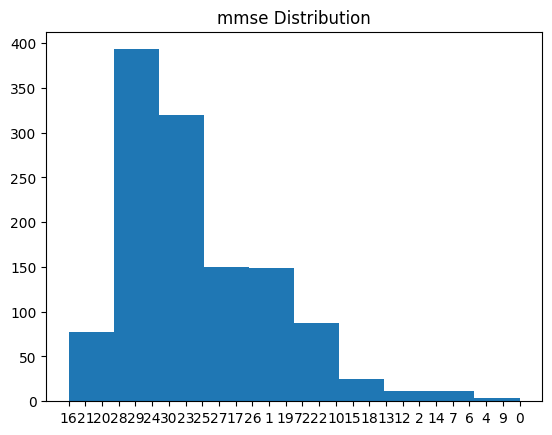

count     1229
unique      28
top         29
freq       177
Name: mmse, dtype: object
29    177
30    141
28    139
27    133
26    116
25    112
24     77
23     67
22     55
21     38
19     32
72     28
20     26
17     17
18     16
16     13
15      9
12      8
14      7
10      4
13      3
6       3
7       2
9       2
1       1
2       1
4       1
0       1
Name: mmse, dtype: int64


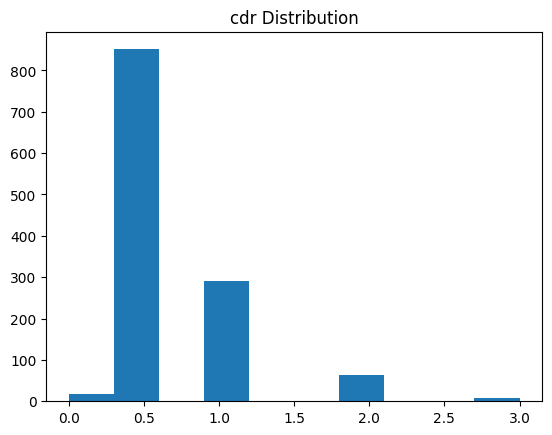

count    1229.000000
mean        0.702604
std         0.415548
min         0.000000
25%         0.500000
50%         0.500000
75%         1.000000
max         3.000000
Name: cdr, dtype: float64
0.5    851
1.0    291
2.0     63
0.0     17
3.0      7
Name: cdr, dtype: int64


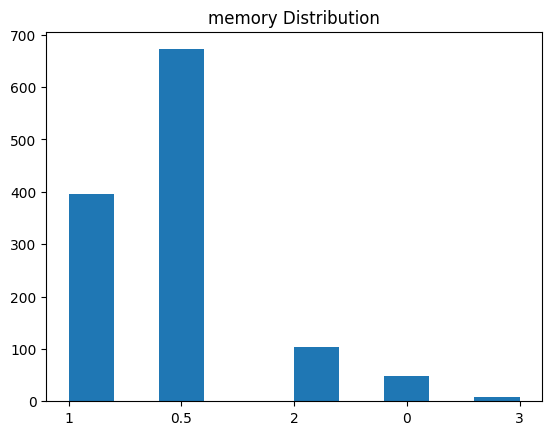

count     1229
unique       5
top        0.5
freq       672
Name: memory, dtype: object
0.5    672
1      396
2      104
0       48
3        9
Name: memory, dtype: int64


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

print('Numerical Variable Distributions:\n')

for var in numerical_vars:
    plt.hist(X[var], bins=10)
    plt.title(var + ' Distribution')
    plt.show()

    # descriptive stats
    print(X[var].describe())
    print(X[var].value_counts())

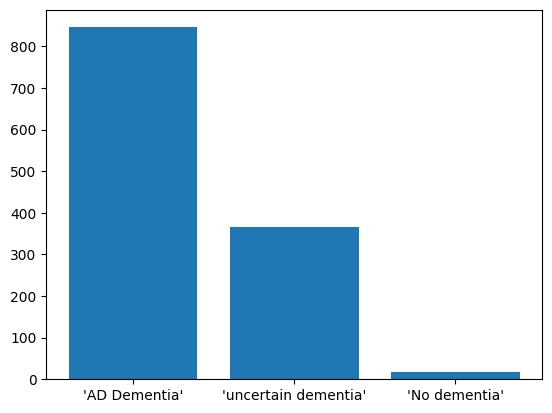

In [ ]:
plt.bar(Y.value_counts().index, Y.value_counts())
plt.show()


In [ ]:
for var in categorical_vars:
    print('Converting', var, 'to 1-hot encoding')

    #get 1-hot and replace original column with the >= 2 categories as columns
    one_hot_df = pd.get_dummies(X[var])
    X = pd.concat([X, one_hot_df], axis=1)
    X = X.drop(var, axis=1)


Converting Gender to 1-hot encoding


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print('X_train:', X_train.shape, '\ty_train:', y_train.shape)
print('X_test:', X_test.shape, '\ty_test:', y_test.shape)
num_test = X_test.shape[0]

X_train: (983, 6) 	y_train: (983,)
X_test: (246, 6) 	y_test: (246,)


Precision is defined as the proportion of true positive predictions out of all positive predictions made by the model. Mathematically, Precision is expressed as follows:

Precision = True Positives / (True Positives + False Positives)

In simpler terms, Precision answers the question: What percentage of my positive predictions were correct?

Recall, also known as sensitivity or hit rate, is defined as the proportion of true positive predictions out of all actual positive instances present in the data. Mathematically, Recall is expressed as follows:

Recall = True Positives / (True Positives + False Negatives)

In simpler terms, Recall answers the question: How many of the actual positive instances did my model correctly identify?


In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score


In [ ]:

tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)


y_pred = tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
classification_report_str = classification_report(y_test, y_pred)

print(f"Decision Tree Accuracy: {accuracy}")
print("\nDecision Tree Classification Report:\n", classification_report_str)

Decision Tree Accuracy: 76.42276422764228

Decision Tree Classification Report:
                       precision    recall  f1-score   support

       'AD Dementia'       0.83      0.84      0.83       174
       'No dementia'       1.00      1.00      1.00         4
'uncertain dementia'       0.58      0.56      0.57        68

            accuracy                           0.76       246
           macro avg       0.80      0.80      0.80       246
        weighted avg       0.76      0.76      0.76       246



In [ ]:
score = cross_val_score(tree_classifier,X,Y,cv=5)
print("cross validation:" ,np.mean(score)*100)

cross validation: 68.43039654886344


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
log_regressor  = LogisticRegression()
log_regressor.fit(X_train,y_train)


LogisticRegression()

In [ ]:
pred = log_regressor.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)*100
classifi_report = classification_report(y_test,y_pred)


print(f"Decision Tree Accuracy: {accuracy}")
print("\nDecision Tree Classification Report:\n", classifi_report)


Decision Tree Accuracy: 76.42276422764228

Decision Tree Classification Report:
                       precision    recall  f1-score   support

       'AD Dementia'       0.83      0.84      0.83       174
       'No dementia'       1.00      1.00      1.00         4
'uncertain dementia'       0.58      0.56      0.57        68

            accuracy                           0.76       246
           macro avg       0.80      0.80      0.80       246
        weighted avg       0.76      0.76      0.76       246



In [ ]:
score = cross_val_score(log_regressor,X,Y,cv=5)
print("cross validation:" ,np.mean(score)*100)

cross validation: 72.74199435871908


In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(random_state = 42)
svm_classifier.fit(X_train,y_train)




SVC(random_state=42)

In [ ]:
pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test,pred)*100
classifi_report = classification_report(y_test,y_pred)



print(f"SVM  Accuracy: {accuracy}")
print("\nSVM Report:\n", classifi_report)


SVM  Accuracy: 70.73170731707317

SVM Report:
                       precision    recall  f1-score   support

       'AD Dementia'       0.83      0.84      0.83       174
       'No dementia'       1.00      1.00      1.00         4
'uncertain dementia'       0.58      0.56      0.57        68

            accuracy                           0.76       246
           macro avg       0.80      0.80      0.80       246
        weighted avg       0.76      0.76      0.76       246



In [ ]:
score = cross_val_score(svm_classifier,X,Y,cv=5)
print("cross validation:" ,np.mean(score)*100)

cross validation: 68.836568773851


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn =  KNeighborsClassifier()

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
pred = knn.predict(X_test)


accuracy = accuracy_score(y_test,pred)*100
classifi_report = classification_report(y_test,y_pred)



print(f"Knn  Accuracy: {accuracy}")
print("\nKnn Report:\n", classifi_report)


Knn  Accuracy: 70.32520325203252

Knn Report:
                       precision    recall  f1-score   support

       'AD Dementia'       0.83      0.84      0.83       174
       'No dementia'       1.00      1.00      1.00         4
'uncertain dementia'       0.58      0.56      0.57        68

            accuracy                           0.76       246
           macro avg       0.80      0.80      0.80       246
        weighted avg       0.76      0.76      0.76       246



In [ ]:
score = cross_val_score(knn,X,Y,cv=5)
print("cross validation:" ,np.mean(score)*100)

cross validation: 65.91173054587689


In [ ]:
from sklearn.ensemble import RandomForestClassifier


random_classifier = RandomForestClassifier(n_estimators=200)
print('Validation Accuracy = ', format(cross_val_score(random_classifier,
                                                       X_train, y_train,
                                                       cv=5).mean(), '.2%'))

Validation Accuracy =  74.87%


In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_clf=GaussianNB()
print('Validation Accuracy = ', format(cross_val_score(NB_clf, X_train, y_train, cv=5).mean(), '.2%'))


Validation Accuracy =  61.54%
